In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle
from glob import glob
from pprint import pprint

repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util

In [2]:
from mejiro.galaxy_galaxy import SampleBELLS

strong_lens = SampleBELLS()
image_positions = strong_lens.get_image_positions()
print(image_positions)

(array([-0.66209205,  0.39826423]), array([ 0.49845985, -0.29808303]))


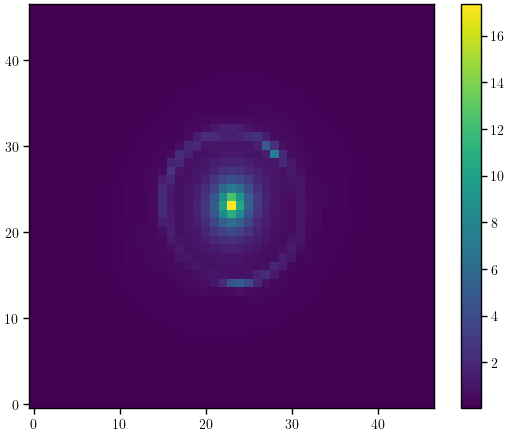

In [3]:
from mejiro.galaxy_galaxy import SampleSL2S
from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage

synthetic_image = SyntheticImage(strong_lens=SampleSL2S(),
                                     instrument=Roman(),
                                     band='F129',
                                     verbose=False)

plt.imshow(synthetic_image.image)
plt.colorbar()
plt.show()

In [2]:
import mejiro
print(os.path.dirname(os.path.dirname(mejiro.__file__)))

/grad/bwedig/mejiro


In [5]:
matplotlib.get_cachedir()

'/grad/bwedig/.cache/matplotlib'

In [6]:
matplotlib.get_configdir()

'/grad/bwedig/.config/matplotlib'

In [5]:
from mejiro.engines import webbpsf_engine

psf_id_string = webbpsf_engine.get_psf_id('F129', 1, (2048, 2048), 1, 47)
webbpsf_engine.cache_psf(psf_id_string, '/grad/bwedig/mejiro/tests/test_data')

Cached PSF to /grad/bwedig/mejiro/tests/test_data/F129_1_2048_2048_1_47.npy


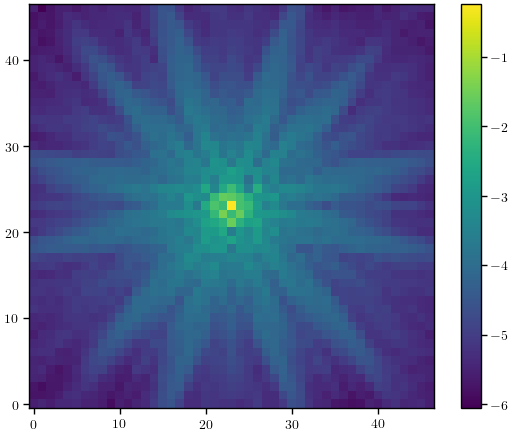

In [6]:
plt.imshow(np.log10(np.load('/grad/bwedig/mejiro/tests/test_data/F129_1_2048_2048_1_47.npy')))
plt.colorbar()
plt.show()

In [3]:
np.nan_to_num(np.array([0]) / np.array([0]))

array([0.])

In [4]:
array = np.array([0, 0, 0])
sum = np.sum(array)
print(array / sum)

[nan nan nan]


In [3]:
ipc_kernel = np.array([[0.001269938, 0.015399776, 0.001199862], \
                       [0.013800177, 1.0, 0.015600367], \
                       [0.001270391, 0.016129619, 0.001200137]])
ipc_kernel /= np.sum(ipc_kernel)

pprint(ipc_kernel)

array([[0.00119146, 0.01444808, 0.00112571],
       [0.01294733, 0.93820048, 0.01463627],
       [0.00119188, 0.01513282, 0.00112597]])


In [20]:
survey_params = util.hydra_to_dict(config.survey)
pipeline_params = util.hydra_to_dict(config.pipeline)

In [21]:
bands = pipeline_params['bands']

In [22]:
runs = survey_params['runs']
scas = survey_params['scas']
pprint(scas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [28]:
for i in range(runs):
    print(scas[i % len(scas)])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2


In [24]:
bands = bands * 3
print(bands)

['F106', 'F129', 'F184', 'F106', 'F129', 'F184', 'F106', 'F129', 'F184']


In [25]:
results = [np.ones((45, 45))] * len(set(bands)) * 3

In [26]:
print(set(bands))
print(len(set(bands)))

{'F106', 'F184', 'F129'}
3


In [27]:
j = 0
for i, (band, result) in enumerate(zip(bands, results)):
    if j == 0:
        print('array')
    elif j == 1:
        print('lens')
    elif j == 2:
        print('source')
    if i % len(set(bands)) == len(set(bands)) - 1:
        j += 1
    # np.save(os.path.join(output_dir, f'galsim_{lens.uid}_{band}.npy'), result)

array
array
array
lens
lens
lens
source
source
source
